In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("air_quality_health_dataset.csv")

In [6]:
df.head()

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539
3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552
4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88489 entries, 0 to 88488
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 88489 non-null  object 
 1   date                 88489 non-null  object 
 2   aqi                  88489 non-null  int64  
 3   pm2_5                88489 non-null  float64
 4   pm10                 88489 non-null  float64
 5   no2                  88489 non-null  float64
 6   o3                   88489 non-null  float64
 7   temperature          88489 non-null  float64
 8   humidity             88489 non-null  int64  
 9   hospital_admissions  88489 non-null  int64  
 10  population_density   88489 non-null  object 
 11  hospital_capacity    88489 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 8.1+ MB


In [12]:
df["city"].value_counts()

city
Delhi          26465
Beijing        22064
Mexico City    13377
Los Angeles     9003
London          6985
Tokyo           6147
Cairo           2700
São Paulo       1748
Name: count, dtype: int64

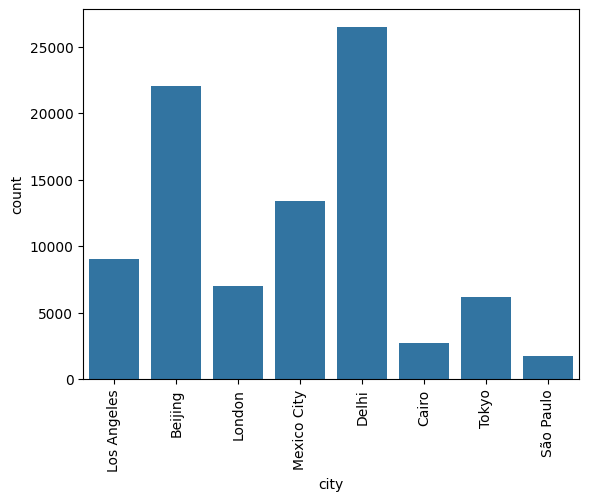

In [33]:
sns.countplot(data=df,x="city")
plt.xticks(rotation=90)
plt.show()

In [22]:
df["date"] = pd.to_datetime(df["date"])

<Axes: xlabel='aqi', ylabel='Count'>

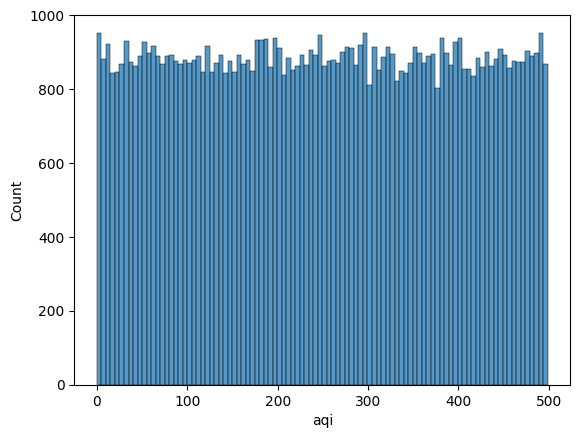

In [37]:
sns.histplot(data=df, x="aqi",bins=100)

In [47]:
lst = df.select_dtypes(include=["int","float"]).columns

In [49]:
lst

Index(['aqi', 'pm2_5', 'pm10', 'no2', 'o3', 'temperature', 'humidity',
       'hospital_admissions', 'hospital_capacity'],
      dtype='object')

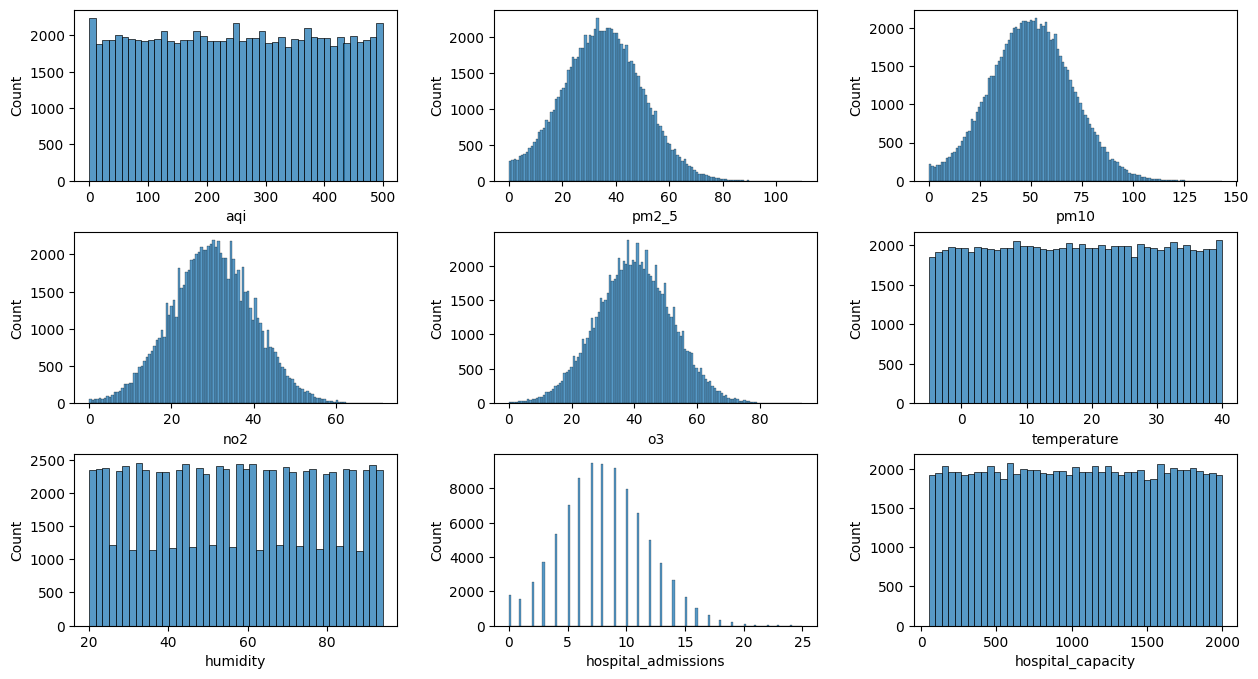

In [51]:

fig, ax = plt.subplots(3,3,figsize=(15,8))
k = 0
try:
    for i in range(3):
        for j in range(3):
            plt.subplots_adjust(wspace=0.3,hspace=0.3)
            sns.histplot(data=df,x=lst[k],ax=ax[i,j])
            k +=1
except IndexError:
    pass

In [53]:
df.head(3)

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539


<Axes: xlabel='population_density', ylabel='count'>

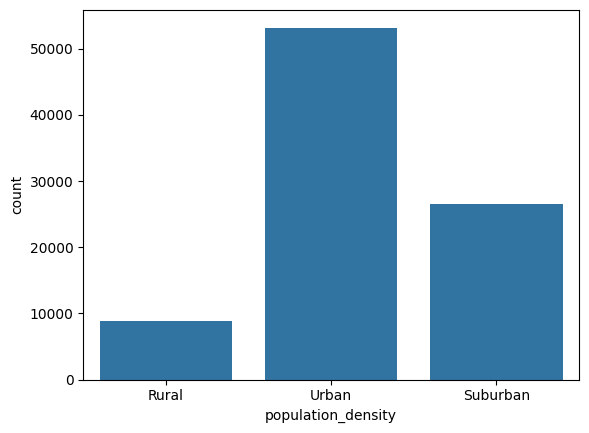

In [55]:
sns.countplot(data=df,x="population_density")

<Axes: xlabel='population_density'>

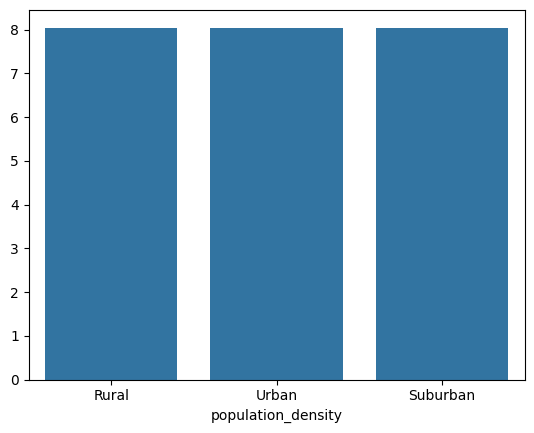

In [57]:
sns.barplot(data=df,x="population_density",y=df["hospital_admissions"].mean())

In [61]:
df.groupby("population_density")["hospital_admissions"].sum()

population_density
Rural        71317
Suburban    212883
Urban       428082
Name: hospital_admissions, dtype: int64